## Computation of the mean absolute error for the Wine Dataset

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from sklearn import preprocessing, linear_model, cross_validation, metrics

In [25]:
# load the regression task data
wine_data = pd.read_csv('data/winequality-white.csv', sep=";")
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
# Load the data into X and y data arrays
X_regr = wine_data.drop(['quality'], axis=1).values
y_regr = wine_data['quality'].values
# Standardize the data
sc = preprocessing.StandardScaler()
sc.fit(X_regr)
X_regr = sc.transform(X_regr)

In [27]:
# Initialize the classifier
lin = linear_model.LinearRegression()

y_pred = cross_validation.cross_val_predict(lin, X_regr, y_regr, cv=5)



print(f'Mean absolute error: {metrics.mean_absolute_error(y_regr,y_pred)}')

Mean absolute error: 0.5938098071627298


## Let's see how the quality is represented in the dataset

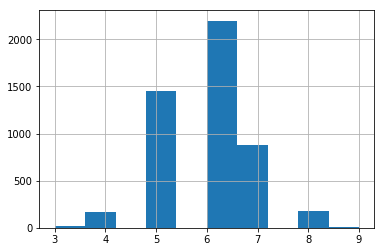

In [29]:
wine_data["quality"].hist()

This is a honest performance

## Computation of the recall for the breast cancer dataset

In [31]:
breast_data = pd.read_csv('data/small_Breast_Ovary.csv', 
                          index_col=0 # first column = sample id ('ID_REF')
                         )
breast_data.head()

,212891_s_at,1565149_at,231148_at,241564_at,206135_at,225186_at,228366_at,204447_at,224369_s_at,216086_at,...,244675_at,221893_s_at,208053_at,244232_at,205390_s_at,1555617_x_at,1562030_at,1555677_s_at,209087_x_at,Tissue
ID_REF,,,,,,,,,,,,,,,,,,,,,
138027,587.6,221.8,18.5,117.5,154.2,369.7,277.2,702.9,1216.9,32.5,...,17.1,551.7,21.5,169.0,117.8,279.2,111.6,8.3,1288.1,Breast
179861,816.3,161.2,23.4,2.2,139.9,237.6,84.8,249.3,1708.3,110.0,...,15.4,539.5,62.1,80.3,7.7,172.0,19.6,6.4,695.1,Breast
38092,516.7,183.4,16.6,27.7,293.2,769.7,88.1,206.7,1995.2,7.0,...,6.7,520.1,4.7,5.2,8.0,62.3,67.0,47.8,1019.0,Breast
89022,364.0,206.1,206.4,1.9,228.8,307.5,216.1,531.2,1092.9,138.5,...,73.9,498.5,11.8,61.7,35.3,133.9,201.0,53.3,4226.6,Breast
138035,927.9,175.4,407.8,5.7,151.4,548.6,537.6,127.2,478.9,372.0,...,40.7,590.1,16.8,21.0,19.5,476.0,323.6,19.4,928.7,Breast


In [33]:
# Drop the 'Tissue' column to create the design matrix
X_clf = np.array(breast_data.drop(['Tissue'], axis=1).values)

# Use the 'Tissue' column to create the labels (0=Breast, 1=Ovary)
y_clf = np.array(breast_data['Tissue'].values)
y_clf[np.where(y_clf == 'Breast')] = 0
y_clf[np.where(y_clf == 'Ovary')] = 1
y_clf = y_clf.astype(np.int)

sc = preprocessing.StandardScaler()
sc.fit(X_clf)
X_clf = sc.transform(X_clf)

In [38]:
log_regr = linear_model.LogisticRegression()

y_pred = cross_validation.cross_val_predict(log_regr, X_regr, y_regr, cv=5)



print(f"Recall: {metrics.recall_score(y_regr,y_pred, average='macro')}")

Recall: 0.20597927129888793
